# MEDICAL CHARGES:
#### Given multiple attributes, we need to predict the insurance costs.

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats

In [135]:
data=pd.read_csv('C:\\Users\\Vibhor Tyagi\\Desktop\\Data Science\\insurance.csv')
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [137]:
data=data.join(pd.get_dummies(data['sex']))
data=data.join(pd.get_dummies(data['smoker']))
data=data.join(pd.get_dummies(data['region']))
data.head(5)

,age,sex,bmi,children,smoker,region,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0


In [138]:
data=data.drop(columns="sex")
data=data.drop(columns="smoker")
data=data.drop(columns="region")
data1=data["charges"]
data=data.drop(columns="charges")
data=data.join(data1)
data=data.drop(columns="female")
data=data.drop(columns="no")
data.head(5)

,age,bmi,children,male,yes,northeast,northwest,southeast,southwest,charges
0,19,27.900,0,0,1,0,0,0,1,16884.92400
1,18,33.770,1,1,0,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,0,1,0,4449.46200
3,33,22.705,0,1,0,0,1,0,0,21984.47061
4,32,28.880,0,1,0,0,1,0,0,3866.85520


# DATA VISUALIZATION

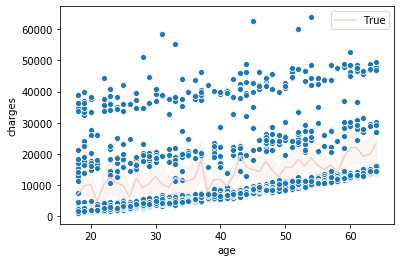

In [139]:
#relation of "age" with "charges"
sns.lineplot(x=data['age'],y=data['charges'],hue=True)
sns.scatterplot(x=data['age'],y=data['charges'])

# GOOD ATTRIBUTE

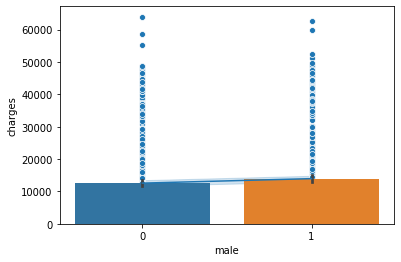

In [140]:
#relation of "male" with "charges"
sns.barplot(x=data['male'],y=data['charges'])
sns.lineplot(x=data['male'],y=data['charges'])
sns.scatterplot(x=data['male'],y=data['charges'])

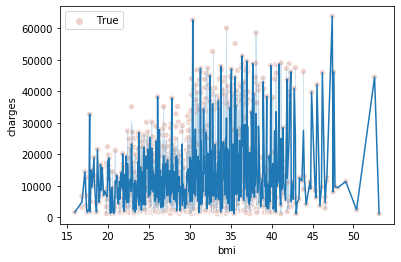

In [141]:
#relation of "bmi" with "charges"
sns.scatterplot(x=data['bmi'],y=data['charges'],hue=True)
sns.lineplot(x=data['bmi'],y=data['charges'])

#NOT A GOOD ATTRIBUTE

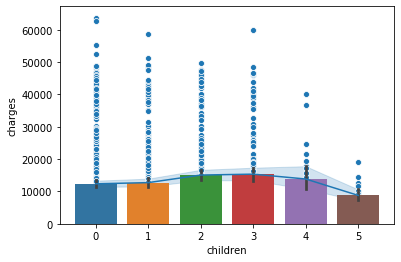

In [132]:
#relation of "children" with "charges"
sns.barplot(x=data['children'],y=data['charges'])
sns.lineplot(x=data['children'],y=data['charges'])
sns.scatterplot(x=data['children'],y=data['charges'])

#NOT A GOOD ATTRIBUTE

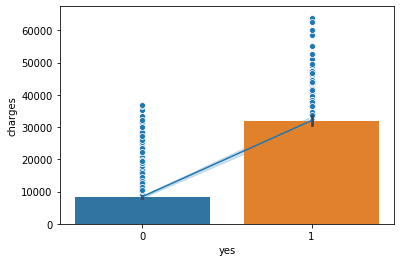

In [122]:
#Relation with smoker("yes") with "charges"
sns.barplot(x=data['yes'],y=data['charges'])
sns.lineplot(x=data['yes'],y=data['charges'])
sns.scatterplot(x=data['yes'],y=data['charges'])

#GOOD ATTRIBUTE

In [147]:
# Relation with 'sex'and 'bmi' are NOT GOOD ATTEIBUTES
# Relation with 'smoker','age',children' may be GOOD ATTRIBUTES.
# We can check the relationship of regions with charges by label encoding it and then forming a bar, line and scatterplot 
# for it to see if any dependecy among them lies.

# REGRESSION MODEL

For Linear Regression, we need to check if the 5 major assumptions hold.

1. No Auto correlation
2. Linearity of variables
3. Normality of error terms
4. No Heteroscedacity
5. No strong MultiCollinearity

# 1st ATTEMPT : TAKING ALL THE ATTRIBUTES

In [148]:
#divide the values into a and b
array=data.values
a=array[:,0:9]
b=array[:,9:10]

In [155]:
test_size=0.20
seed=7
X_train,X_test,Y_train,Y_test = train_test_split(a,b,test_size = test_size,  random_state=seed)
type(X_train)

numpy.ndarray

In [156]:
#fit the model on 20%
model = LinearRegression()
model.fit(X_train, Y_train)
Y_predict=model.predict(X_test)

print("Accuracy percentage:",model.score(X_test,Y_test)*100)

Accuracy percentage: 76.38170729823929


# 2nd ATTEMPT : CHOOSING ONLY GOOD ATTRIBUTES

In [158]:
data1=data
data1.head(5)

,age,bmi,children,male,yes,northeast,northwest,southeast,southwest,charges
0,19,27.900,0,0,1,0,0,0,1,16884.92400
1,18,33.770,1,1,0,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,0,1,0,4449.46200
3,33,22.705,0,1,0,0,1,0,0,21984.47061
4,32,28.880,0,1,0,0,1,0,0,3866.85520


In [160]:
df=pd.DataFrame(data1['age'])
df1=pd.DataFrame(data1['yes'])
df2=pd.DataFrame(data1['children'])
df4=pd.DataFrame(data1['charges'])
df=df.join(df1)
df=df.join(df2) 
df=df.join(df4)
df.head(1)

,age,yes,children,charges
0,19,1,0,16884.924


In [166]:
arr=df.values
p=arr[:,0:3]
q=arr[:,3:4]

In [167]:
test_size=0.20
seed=7
x_train,x_test,y_train,y_test = train_test_split(p,q,test_size = test_size,  random_state=seed)
type(x_train)

numpy.ndarray

In [168]:
#fit the model on 20%
model1 = LinearRegression()
model1.fit(x_train,y_train)
y_predict=model1.predict(x_test)
model_scr = model1.score(x_test,y_test)
print(model_scr)

0.745980028871786


# 3rd ATTEMPT : Using XGBOOST Regressor 

In [169]:
from xgboost import XGBRegressor

In [170]:
# fit model no training data
model3 = XGBRegressor()
model3.fit(X_train, Y_train)

[19:30:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [171]:
predictions = model3.predict(X_test)
predictions

array([12651.683 , 10325.342 ,  2018.0731, 17031.973 , 12689.84  ,
        2031.4194, 16892.488 ,  8355.098 ,  4563.221 ,  9366.806 ,
        5379.85  ,  6775.36  ,  4931.7666,  4306.339 , 12849.205 ,
       10728.396 ,  4968.805 , 15323.26  , 11692.09  , 10737.871 ,
        6489.1816,  4380.1123, 38485.004 , 24324.205 , 18746.002 ,
       21837.299 , 45122.664 , 39150.156 ,  8136.5605,  7978.5474,
       12965.773 , 22335.375 ,  5453.7227, 12392.89  , 12663.999 ,
        2573.153 ,  6370.196 ,  5783.518 ,  9681.111 ,  2740.406 ,
        8641.899 ,  6227.7754,  8538.7705,  7666.568 ,  6593.914 ,
        6098.812 ,  6098.572 , 45043.375 , 23894.62  , 14221.549 ,
        8730.181 , 20953.914 ,  9130.423 ,  9523.5625,  3216.708 ,
       42037.016 , 27059.848 , 10333.94  ,  4525.2485,  4080.478 ,
        8177.7275, 14495.513 ,  9945.148 , 15215.787 ,  6859.4116,
       32323.148 , 14892.284 ,  2916.9165, 47075.426 ,  3720.688 ,
       25061.684 ,  7603.96  ,  5618.589 , 46762.895 ,  5095.2

In [172]:
print("Using XGBoost accuracy is(in percentage):", model3.score(X_train,Y_train)*100)

Using XGBoost accuracy is(in percentage): 89.80592917356502
